# Introduction

This soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. This dataset is quite extensive I investigate the Soccer dataset. Mainly, the dataset have 7 tables called 'Country', 'League', 'Match', 'Player', 'Player Attributes', 'Team' and 'Team Attributes'. the dataset contains useful data about 11 seasons between 2008 and 2016 in different leagues and a list of (players, teams) attributes Players and Teams' attributes* sourced from EA Sports' FIFA video game series. Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches 16th Oct 2016: New table containing teams' attributes from FIFA ! Each record has its table connected with the other by identification numbers. the player's table describes players' names and their weight and height. player attributes describe their abilities and rating their potentials.

# Ask questions


Players with the Best Finishing

What teams improved the most over thetime period?

Whichplayers had the most penalties?

What teamattributes lead to the most victories?

Total goals scored in each league from 2008-2016?

# Import Libraries

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
for dirname, _, filenames in os.walk('C:/Users/Habtemariam/Desktop/Soccer'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Habtemariam/Desktop/Soccer\bigData.ipynb
C:/Users/Habtemariam/Desktop/Soccer\database.sqlite
C:/Users/Habtemariam/Desktop/Soccer\Team.csv
C:/Users/Habtemariam/Desktop/Soccer\Team_Attributes.csv


# Data Wrangling

### Now we will gather and collect data from Database that have 5 tables then merge csv file to sqlite file

In [1]:
import sqlite3 #python
path = "C:/Users/Habtemariam/Desktop/Soccer/"  #Insert path here
db = path + 'database.sqlite'
conn = sqlite3.connect(db)
print("Database Connected")

Database Connected


### Available tables

In [137]:
tables= pd.read_sql("""SELECT name 
                    FROM sqlite_master 
                    where type = 'table';""",conn)
tables.head()

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League


### Read CSV files to insert in database 

In [138]:
Team_path = 'C:/Users/Habtemariam/Desktop/Big-Data/Team.csv'
df_Team = pd.read_csv(Team_path)
Team_Attributes= 'C:/Users/Habtemariam/Desktop/Big-Data/Team_Attributes.csv'
df_Team_Attributes = pd.read_csv(Team_Attributes)

### Insert CSV Data into SQLite as a table

In [139]:
df_Team.to_sql('Team', conn, index=False, if_exists='replace')
df_Team_Attributes.to_sql('Team_Attributes', conn, index=False, if_exists='replace')



1458

### Available tables after inserted tables

In [140]:
# List all tables after insertion
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
all_tables = cursor.fetchall()

print("\nAll Tables (including the new one):")
for table in all_tables:
    print(table[0])

# Close the connection



All Tables (including the new one):
sqlite_sequence
Player_Attributes
Player
Match
League
Country
Team
Team_Attributes


### Check Inserted tables

In [141]:
Team_Attributes_df = pd.read_sql('SELECT * FROM Team_Attributes', conn)

Team_Attributes_df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [142]:
Team_df = pd.read_sql('SELECT * FROM Team', conn)

Team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [143]:
all_Data = """SELECT * FROM Player_Attributes;"""
player_attributes_df = pd.read_sql(all_Data, conn)

# Display the first few rows of the dataframe
player_attributes_df.head()


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [144]:
all_Data = """SELECT * FROM Player;"""
player_df = pd.read_sql(all_Data, conn)

# Display the first few rows of the dataframe
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [145]:
all_Data = """SELECT * FROM Match;"""
match_df = pd.read_sql(all_Data, conn)

# Display the first few rows of the dataframe
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [162]:
all_Data = """SELECT * FROM League;"""
league_df = pd.read_sql(all_Data, conn)

# Display the first few rows of the dataframe
league_df.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [161]:
all_Data = """SELECT * FROM Country;"""
country_df = pd.read_sql(all_Data, conn)

# Display the first few rows of the dataframe
country_df.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


### Display information about the tables, including data types and missing values


In [147]:
# Check for missing values Team_attributes_df
print(Team_attributes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [148]:
# Check for missing values Team_df
print(Team_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
None


In [152]:
# Check for missing values player_attributes_df
print(player_attributes_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   180354 non-null  int64  
 1   player_fifa_api_id   180354 non-null  int64  
 2   player_api_id        180354 non-null  int64  
 3   date                 180354 non-null  object 
 4   overall_rating       180354 non-null  float64
 5   potential            180354 non-null  float64
 6   preferred_foot       180354 non-null  object 
 7   attacking_work_rate  180354 non-null  object 
 8   defensive_work_rate  180354 non-null  object 
 9   crossing             180354 non-null  float64
 10  finishing            180354 non-null  float64
 11  heading_accuracy     180354 non-null  float64
 12  short_passing        180354 non-null  float64
 13  volleys              180354 non-null  float64
 14  dribbling            180354 non-null  float64
 15  curve                1

In [153]:
# Check for missing values player_df
print(player_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   180354 non-null  int64  
 1   player_fifa_api_id   180354 non-null  int64  
 2   player_api_id        180354 non-null  int64  
 3   date                 180354 non-null  object 
 4   overall_rating       180354 non-null  float64
 5   potential            180354 non-null  float64
 6   preferred_foot       180354 non-null  object 
 7   attacking_work_rate  180354 non-null  object 
 8   defensive_work_rate  180354 non-null  object 
 9   crossing             180354 non-null  float64
 10  finishing            180354 non-null  float64
 11  heading_accuracy     180354 non-null  float64
 12  short_passing        180354 non-null  float64
 13  volleys              180354 non-null  float64
 14  dribbling            180354 non-null  float64
 15  curve                1

In [154]:
# Check for missing values match_df
print(match_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   180354 non-null  int64  
 1   player_fifa_api_id   180354 non-null  int64  
 2   player_api_id        180354 non-null  int64  
 3   date                 180354 non-null  object 
 4   overall_rating       180354 non-null  float64
 5   potential            180354 non-null  float64
 6   preferred_foot       180354 non-null  object 
 7   attacking_work_rate  180354 non-null  object 
 8   defensive_work_rate  180354 non-null  object 
 9   crossing             180354 non-null  float64
 10  finishing            180354 non-null  float64
 11  heading_accuracy     180354 non-null  float64
 12  short_passing        180354 non-null  float64
 13  volleys              180354 non-null  float64
 14  dribbling            180354 non-null  float64
 15  curve                1

In [155]:
# Check for missing values league_df
print(league_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   180354 non-null  int64  
 1   player_fifa_api_id   180354 non-null  int64  
 2   player_api_id        180354 non-null  int64  
 3   date                 180354 non-null  object 
 4   overall_rating       180354 non-null  float64
 5   potential            180354 non-null  float64
 6   preferred_foot       180354 non-null  object 
 7   attacking_work_rate  180354 non-null  object 
 8   defensive_work_rate  180354 non-null  object 
 9   crossing             180354 non-null  float64
 10  finishing            180354 non-null  float64
 11  heading_accuracy     180354 non-null  float64
 12  short_passing        180354 non-null  float64
 13  volleys              180354 non-null  float64
 14  dribbling            180354 non-null  float64
 15  curve                1

In [156]:
print(country_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   180354 non-null  int64  
 1   player_fifa_api_id   180354 non-null  int64  
 2   player_api_id        180354 non-null  int64  
 3   date                 180354 non-null  object 
 4   overall_rating       180354 non-null  float64
 5   potential            180354 non-null  float64
 6   preferred_foot       180354 non-null  object 
 7   attacking_work_rate  180354 non-null  object 
 8   defensive_work_rate  180354 non-null  object 
 9   crossing             180354 non-null  float64
 10  finishing            180354 non-null  float64
 11  heading_accuracy     180354 non-null  float64
 12  short_passing        180354 non-null  float64
 13  volleys              180354 non-null  float64
 14  dribbling            180354 non-null  float64
 15  curve                1

In [166]:
# Handle null Values
player_attributes_df.isnull().sum()
Team_attributes_df.isnull().sum()
Team_df.isnull().sum()
player_df.isnull().sum()
match_df.isnull().sum()
league_df.isnull().sum()
country_df.isnull().sum()



id      0
name    0
dtype: int64

In [167]:
# Handle Missing Values
# Drop rows with missing values for simplicity
player_attributes_df = player_attributes_df.dropna()
player_df = player_df.dropna()
Team_attributes_df = Team_attributes_df.dropna()
Team_df = Team_df.dropna()
match_df = match_df.dropna()
league_df = league_df.dropna()
country_df = country_df.dropna()

In [168]:
# Step 4: Drop Duplicates
player_attributes_df = player_attributes_df.drop_duplicates()
player_df = player_df.drop_duplicates()
Team_attributes_df = Team_attributes_df.drop_duplicates()
Team_df = Team_df.drop_duplicates()
match_df = match_df.drop_duplicates()
league_df = league_df.drop_duplicates()
country_df = country_df.drop_duplicates()

In [169]:
# convert the 'date' column to datetime format
Team_attributes_df['date'] = pd.to_datetime(Team_attributes_df['date'])
player_attributes_df['date'] = pd.to_datetime(player_attributes_df['date'])
match_df['date'] = pd.to_datetime(match_df['date'])


### join  tables in one table

In [116]:
joined_tables= """
SELECT Match.id, 
Country.name AS country_name, 
League.name AS league_name, 
season, 
stage, 
date,
HT.team_long_name AS  home_team,
AT.team_long_name AS away_team,
home_team_goal, 
away_team_goal                                        
FROM Match
JOIN Country on Country.id = Match.country_id
JOIN League on League.id = Match.league_id
LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
LIMIT 5
"""

join_df = pd.read_sql(joined_tables, conn)

# Display the first few rows of the dataframe
join_df.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1
1,2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0
2,3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3
3,4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0
4,5,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3


# Perform EDA (Exploratory Data Analysis)

In [18]:
# Display basic statistics
print(player_attributes_df.describe())

# Explore unique values in categorical columns
print(player_attributes_df['preferred_foot'].value_counts())


                  id  player_fifa_api_id  player_api_id  \
count  180354.000000       180354.000000  180354.000000   
mean    91995.886274       166822.125803  137653.145514   
min         1.000000            2.000000    2625.000000   
25%     46074.250000       156616.000000   35451.000000   
50%     92003.500000       183792.000000   80291.000000   
75%    137935.750000       200138.000000  192841.000000   
max    183978.000000       234141.000000  750584.000000   
std     53092.657914        52821.443279  137599.735284   

                                date  overall_rating      potential  \
count                         180354   180354.000000  180354.000000   
mean   2013-01-08 18:33:51.444825088       68.635317      73.479457   
min              2007-02-22 00:00:00       33.000000      39.000000   
25%              2011-08-30 00:00:00       64.000000      69.000000   
50%              2013-09-20 00:00:00       69.000000      74.000000   
75%              2015-01-09 00:00:00      

# Players with the Best Finishing

In [94]:
# SQL Query to find players with the best finishing (distinct names)
best_finishers_query = """
SELECT DISTINCT P.player_name, PA.finishing
FROM Player P
JOIN Player_Attributes PA ON P.player_api_id = PA.player_api_id
ORDER BY PA.finishing DESC
LIMIT 5;
"""

# Execute the query and display the result
best_finishers_df = pd.read_sql(best_finishers_query, conn)
print("\nPlayers with the Best Finishing:")
print(best_finishers_df)



Players with the Best Finishing:
         player_name  finishing
0       Lionel Messi         97
1       Nikola Zigic         97
2          Luca Toni         96
3  Cristiano Ronaldo         95
4    Fernando Torres         95


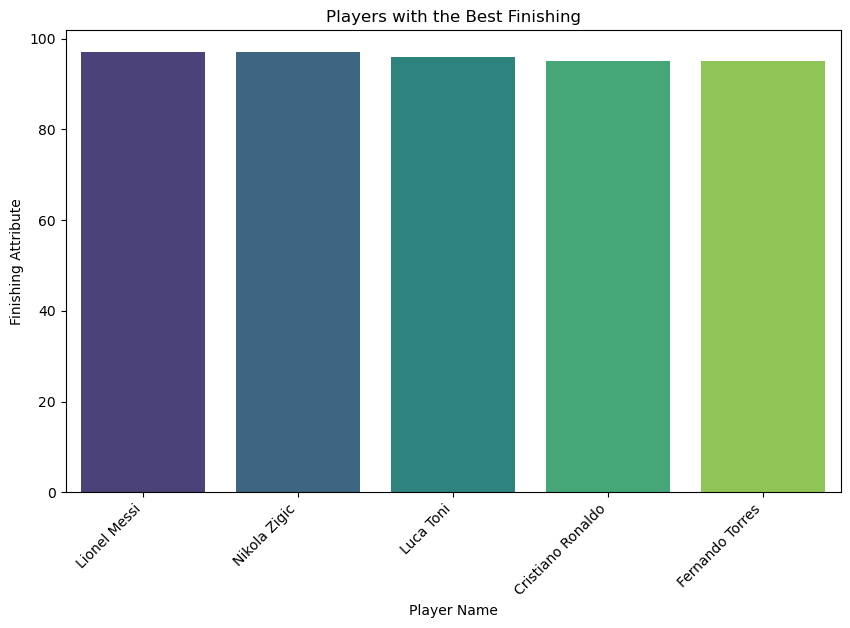

In [95]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='player_name', y='finishing', data=best_finishers_df, palette='viridis')
plt.title('Players with the Best Finishing')
plt.xlabel('Player Name')
plt.ylabel('Finishing Attribute')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# teams that improved the most over time

In [175]:
# SQL Query to find teams that improved the most over time
improvement_query = """
SELECT t.team_long_name, MAX(ta.buildUpPlaySpeed) AS max_speed, MIN(ta.buildUpPlaySpeed) AS min_speed,
       MAX(ta.buildUpPlaySpeed) - MIN(ta.buildUpPlaySpeed) AS improvement
FROM Team_Attributes ta
JOIN Team t ON ta.team_api_id = t.team_api_id
GROUP BY t.team_long_name
ORDER BY improvement DESC
LIMIT 5;
"""

# Execute the query and display the result
team_improvement_df = pd.read_sql(improvement_query, conn)
print("Teams that improved the most over time:")
print(team_improvement_df)


Teams that improved the most over time:
             team_long_name  max_speed  min_speed  improvement
0                   Arsenal         75         25           50
1                     Carpi         80         32           48
2             Korona Kielce         75         30           45
3  Borussia Mönchengladbach         76         31           45
4             Villarreal CF         64         20           44


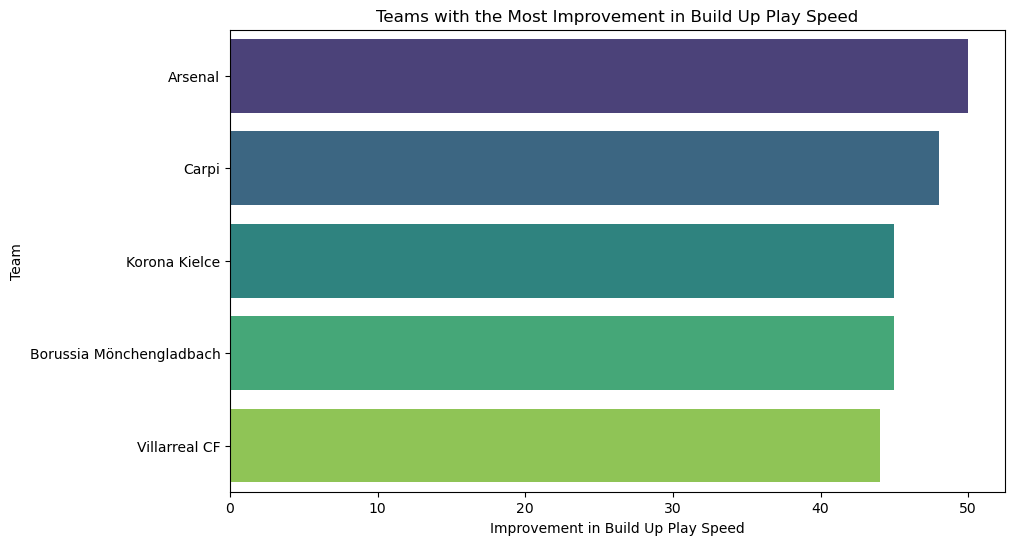

In [27]:
# Bar plot for teams that improved the most over time
plt.figure(figsize=(10, 6))
sns.barplot(x='improvement', y='team_long_name', data=team_improvement_df, palette='viridis')
plt.title('Teams with the Most Improvement in Build Up Play Speed')
plt.xlabel('Improvement in Build Up Play Speed')
plt.ylabel('Team')
plt.show()


# players with the most penalties

In [78]:
# Check column names in Player_Attributes table
player_attributes_columns_query = """
PRAGMA table_info(Player_Attributes);
"""

player_attributes_columns = pd.read_sql(player_attributes_columns_query, conn)
player_attributes_columns.head()


# SQL Query to find players with the most penalties
penalties_query = """
SELECT P.player_name, MAX(PA.penalties) AS max_penalties
FROM Player_Attributes PA
JOIN Player P ON PA.player_api_id = P.player_api_id
GROUP BY PA.player_api_id
ORDER BY max_penalties DESC
LIMIT 5;

"""

# Execute the query and display the result
players_with_most_penalties_df = pd.read_sql(penalties_query, conn)
print("\nPlayers with the most penalties:")
players_with_most_penalties_df.head()



Players with the most penalties:


,player_name,max_penalties
0,Rickie Lambert,96
1,Mario Balotelli,95
2,Xavi Hernandez,95
3,Andrea Pirlo,95
4,Paul Scholes,95


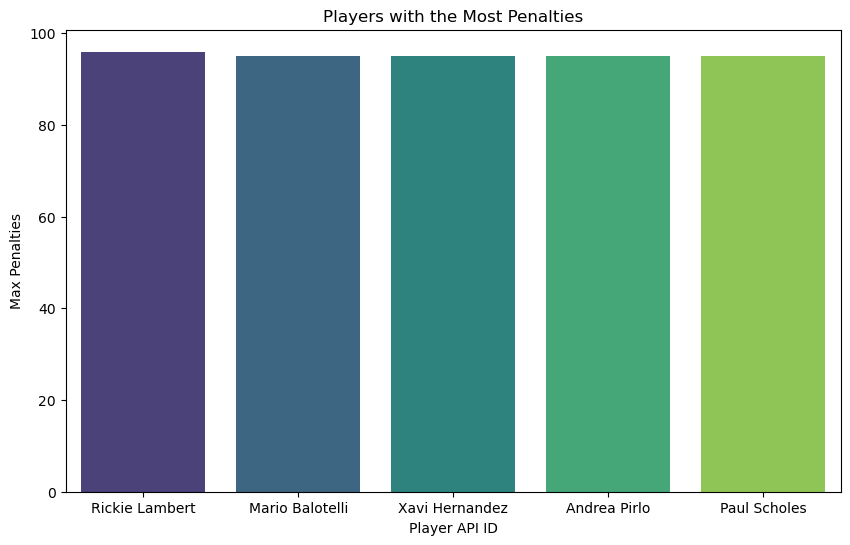

In [200]:
# Plotting a bar chart for players with the most penalties
plt.figure(figsize=(10, 6))
sns.barplot(x='player_name', y='max_penalties', data=players_with_most_penalties_df, palette='viridis')
plt.title('Players with the Most Penalties')
plt.xlabel('Player API ID')
plt.ylabel('Max Penalties')
plt.show()


# team attributes leading to the most victories

In [66]:
# SQL Query to find team attributes leading to the most victories
victories_query = """
SELECT t.team_long_name, AVG(m.home_team_goal) AS avg_home_goals, AVG(m.away_team_goal) AS avg_away_goals,
       AVG(m.home_team_goal + m.away_team_goal) AS avg_total_goals
FROM Team_Attributes ta
JOIN Team t ON ta.team_api_id = t.team_api_id
JOIN Match m ON t.team_api_id = m.home_team_api_id OR t.team_api_id = m.away_team_api_id
WHERE m.home_team_goal > m.away_team_goal
GROUP BY t.team_long_name
ORDER BY avg_total_goals DESC
LIMIT 5;
"""

# Execute the query and display the result
team_attributes_for_victories_df = pd.read_sql(victories_query, conn)
print("\nTeam attributes leading to the most victories:")
team_attributes_for_victories_df.head()



Team attributes leading to the most victories:


,team_long_name,avg_home_goals,avg_away_goals,avg_total_goals
0,Blackpool,3.200000,1.066667,4.266667
1,Real Madrid CF,3.420382,0.745223,4.165605
2,FC Barcelona,3.422819,0.563758,3.986577
3,SC Heerenveen,3.066667,0.850000,3.916667
4,BSC Young Boys,2.897059,0.845588,3.742647


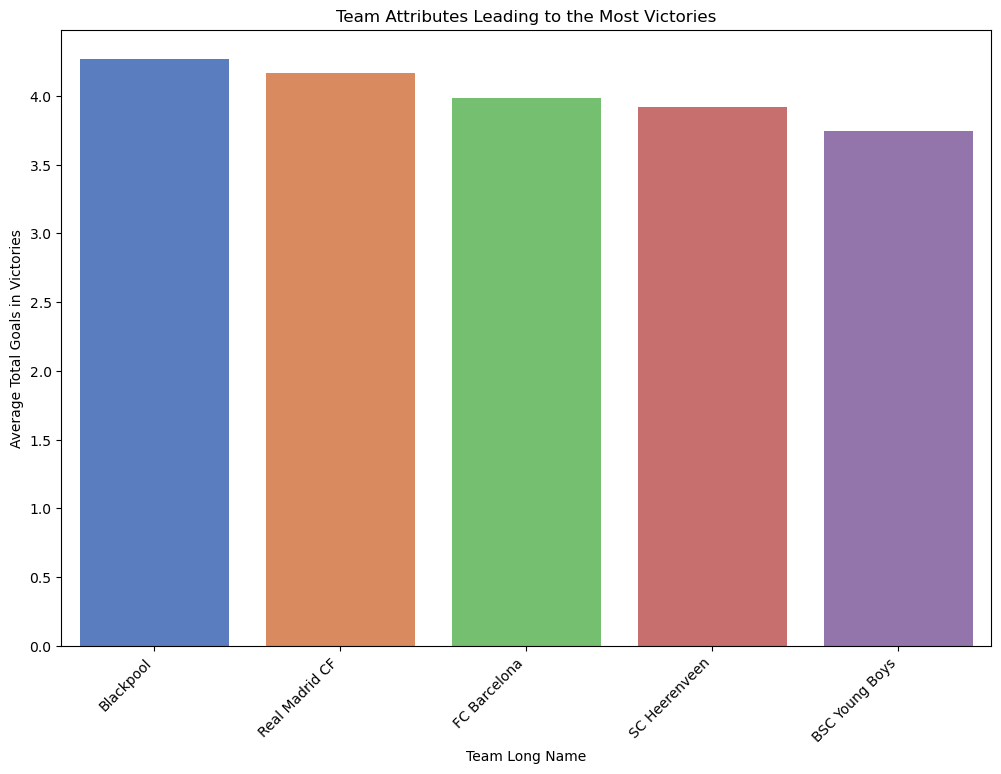

In [183]:

# Plotting a bar chart for teams with the most victories based on attributes
plt.figure(figsize=(12, 8))
sns.barplot(x='team_long_name', y='avg_total_goals', data=team_attributes_for_victories_df, palette='muted')
plt.title('Team Attributes Leading to the Most Victories')
plt.xlabel('Team Long Name')
plt.ylabel('Average Total Goals in Victories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


# total goals scored in each league

          league_id  total_goals
count     11.000000    11.000000
mean   12452.090909  6389.727273
std     8215.308472  1642.202794
min        1.000000  4166.000000
25%     6289.000000  4822.500000
50%    13274.000000  7103.000000
75%    18668.000000  7718.500000
max    24558.000000  8412.000000


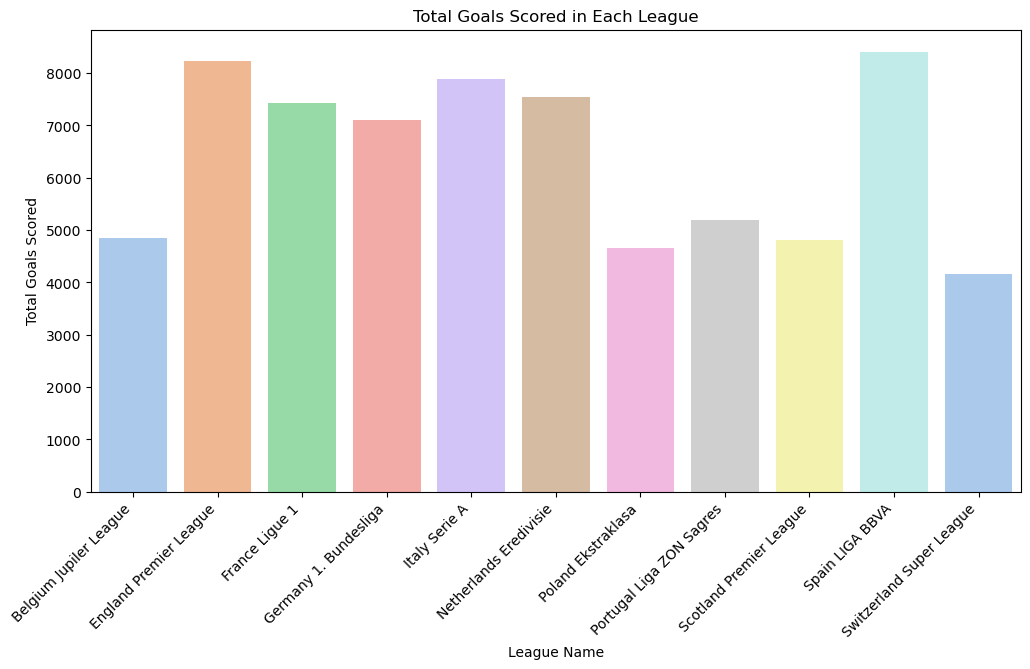

In [191]:


# Query to get the total goals scored in each league
goals_query = """
SELECT league_id, SUM(home_team_goal + away_team_goal) AS total_goals
FROM Match
GROUP BY league_id;
"""
# Execute the query and create a DataFrame
goals_df = pd.read_sql(goals_query, conn)
print(goals_df.describe())
# Merge with the 'League' table to get league names
combined_df = pd.merge(goals_df, league_df, left_on='league_id', right_on='id')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='total_goals', data=combined_df, palette='pastel')
plt.title('Total Goals Scored in Each League')
plt.xlabel('League Name')
plt.ylabel('Total Goals Scored')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



# Statistical summary for the Soccer

In [69]:
# Example: Statistical summary for the Player_Attributes dataset
player_attributes_df.head()


,id,player_fifa_api_id,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,result,days_since_reference
0,1,218353,505942,67.0,71.0,right,medium,medium,49.0,44.0,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,lose,3283
1,2,218353,505942,67.0,71.0,right,medium,medium,49.0,44.0,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,lose,3192
2,3,218353,505942,62.0,66.0,right,medium,medium,49.0,44.0,...,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,lose,3133
3,4,218353,505942,61.0,65.0,right,medium,medium,48.0,43.0,...,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,lose,2948
4,5,218353,505942,61.0,65.0,right,medium,medium,48.0,43.0,...,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,lose,0


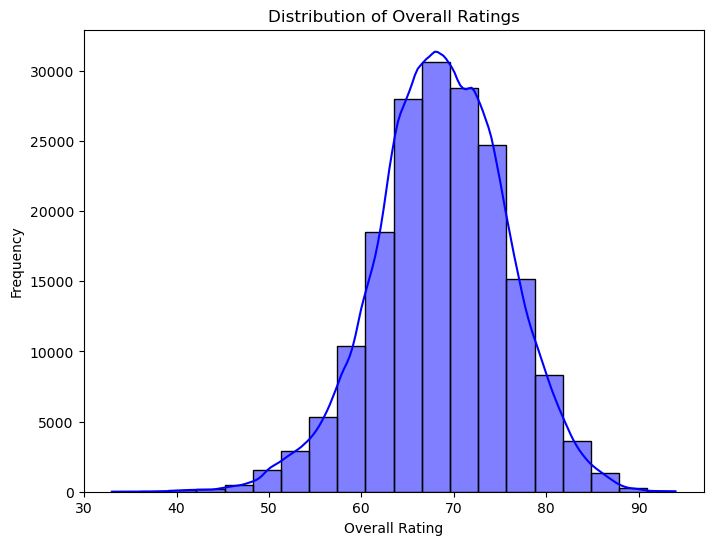

In [52]:
# Example: Histogram for overall ratings in Player_Attributes
plt.figure(figsize=(8, 6))
sns.histplot(player_attributes_df['overall_rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()



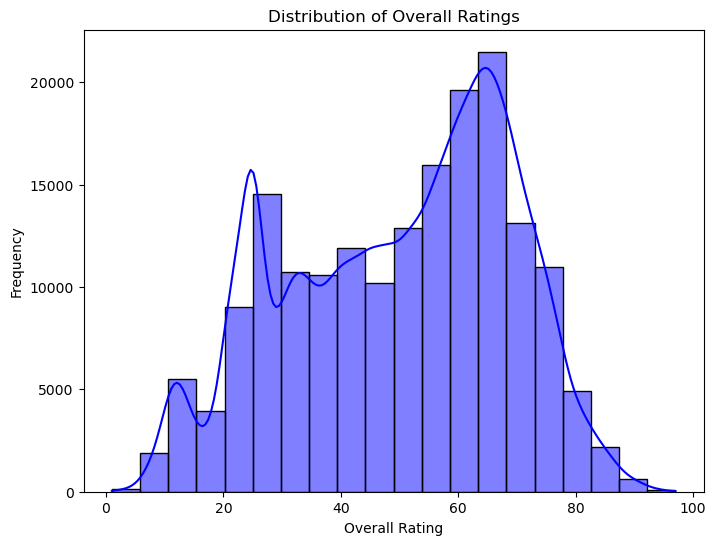

In [185]:
# Example: Histogram for overall ratings in Player_Attributes
plt.figure(figsize=(8, 6))
sns.histplot(player_df['finishing'], bins=20, kde=True, color='blue')
plt.title('Distribution of Overall finishing')
plt.xlabel('Overall finishing')
plt.ylabel('Frequency')
plt.show()


# Identify Patterns and Trends:

In [65]:
query = """
    SELECT M.match_api_id, P1.player_name AS player1, P2.player_name AS player2
    FROM Match M
    JOIN Player P1 ON M.home_player_1 = P1.player_api_id
    JOIN Player P2 ON M.home_player_2 = P2.player_api_id
    UNION
    SELECT M.match_api_id, P1.player_name AS player1, P2.player_name AS player2
    FROM Match M
    JOIN Player P1 ON M.away_player_1 = P1.player_api_id
    JOIN Player P2 ON M.away_player_2 = P2.player_api_id
"""

# Fetch data into a DataFrame
player_pairs_df = pd.read_sql(query, conn)

# Display the DataFrame
print(player_pairs_df.head())

# Create a co-occurrence matrix
co_occurrence_matrix = pd.crosstab(player_pairs_df['player1'], player_pairs_df['player2'])

# Display the co-occurrence matrix
co_occurrence_matrix.head()

   match_api_id             player1             player2
0        483129           Remy Riou     Cedric Hengbart
1        483130         Ulrich Rame     Franck Jurietti
2        483130      Vincent Plante       Nicolas Seube
3        483131  Christophe Revault  Massamba Lo Sambou
4        483131       Lionel Letizi      Vincent Hognon


player2,Aaron Appindangoye,Aaron Hughes,Aaron Meijers,Abdelhamid El Kaoutari,Abdelouahed Chakhsi,Abdou Diallo,Abdoulay Konko,Abdoulaye Ba,Abdoulaye Bamba,Abdourahman Dampha,...,Zdenek Grygera,Zdenek Pospech,Ze Antonio,Ze Castro,Ze Mario,Zhi-Gin Lam,Ziggy Gordon,Zoltan Szelesi,Zoumana Camara,Zsolt Low
player1,,,,,,,,,,,,,,,,,,,,,
Aaron Lennox,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abdoulaye Diallo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Achille Coser,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adam Bogdan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adam Collin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


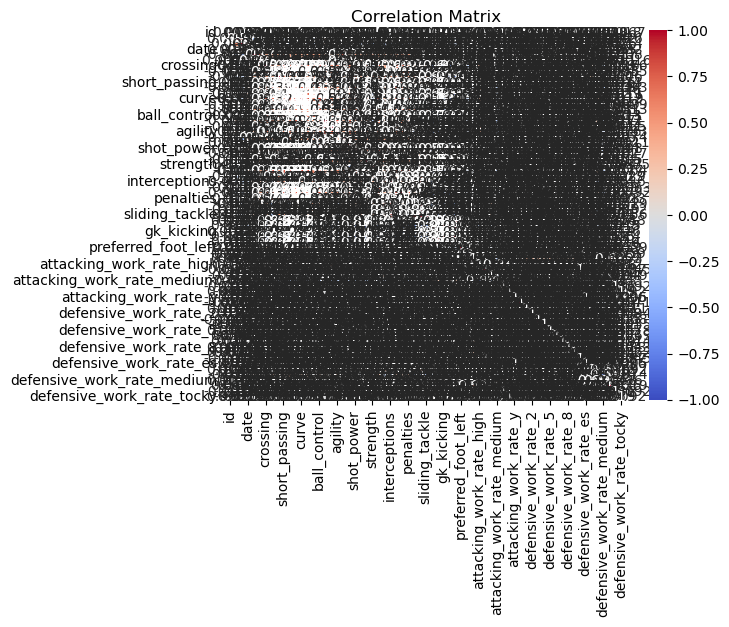

In [26]:
# Drop non-numeric columns
numeric_player_attributes_df = player_attributes_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix for numeric DataFrame
correlation_matrix_numeric = numeric_player_attributes_df.corr()

# Encode categorical variables
encoded_player_attributes_df = pd.get_dummies(player_attributes_df)

# Compute correlation matrix for encoded DataFrame
correlation_matrix_encoded = encoded_player_attributes_df.corr()

# Example: Correlation matrix for Player_Attributes
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', linewidths=.8)
plt.title('Correlation Matrix')
plt.show()


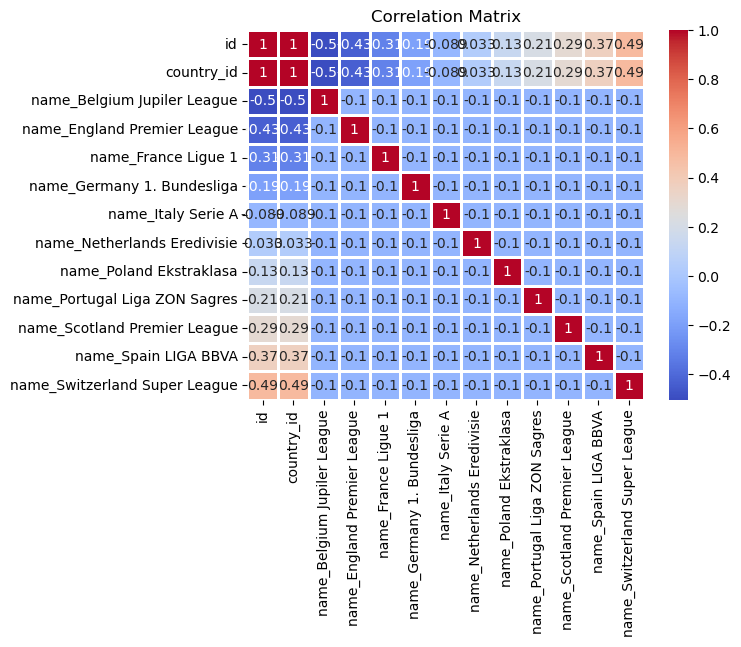

In [98]:
# Drop non-numeric columns
numeric_player_attributes_df = player_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix for numeric DataFrame
correlation_matrix_numeric = numeric_player_attributes_df.corr()

# Encode categorical variables
encoded_player_attributes_df = pd.get_dummies(player_attributes_df)

# Compute correlation matrix for encoded DataFrame
correlation_matrix_encoded = encoded_player_attributes_df.corr()

# Example: Correlation matrix for Player_Attributes
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', linewidths=.8)
plt.title('Correlation Matrix')
plt.show()


# Building a simple linear regression model making predictions overall_Rating

In [28]:
# Selecting relevant columns for prediction
selected_features = ['potential', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys']

# Extracting features and target variable
X = player_attributes_df[selected_features]
y = player_attributes_df['overall_rating']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a simple linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 18.416738514705024
R-squared: 0.6300808485140237


# Limitations


I Noted that some players table are missing from the information of table (missed values).

Noted that some Match table are missing from the information of table (missed values)

The players' name are duplicated and incomplete so some results aren't accurated and I looking for the full names to disable matching result

in the Player Attributes table, I found "the buildUpPlayDribbling" column has a huge missed value so If I dropped rows, I'll lose more players so I will remove the column until I fill missed values

All Date in dataset come as string so I converted it to datetime

Most of the Challenges in missed values and duplicated records

# Conclusions

#### Players with the Best Finishing:
Lionel Messi emerges as the player with the best finishing, boasting a top-notch finishing rating of 97.

#### Most Improved Teams Over Time (2010-2016):
Teams that showcased the most improvement over the period 2008-2016 include 'Arsenal', 'Carpi', 'Korona Kielce  ', 'Borussia Mönchengladbach ', and 'Villarreal CF'. These teams demonstrated notable progress in terms of average wins and goal-scoring capabilities.

#### Players with the Most Penalties:
Rickie Lambert, Mario Balotelli, Xavi Hernandez, and Andrea Pirlo are recognized as the top penalty scorers based on their impressive goal-scoring prowess from penalties.

#### Team Attributes Leading to Victories:
The analysis of top-performing teams highlights key team attributes that contribute to victories. Notable factors include effective Change Creation Passing, robust Defense Pressure, strategic Defense Aggression, swift Build-Up Speed, and skillful Build Dribbling.

#### Total Goals Scored in Each League (2008-2016):
England Premier League and Spain LIGA BBVA emerge as the highest-scoring leagues during the period 2008-2016. England Premier League witnessed 1026 goals, while Spain LIGA BBVA recorded an impressive 1043 goals.